# Mining association rules

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

Here we explore the idea of mining association rules from transaction data. Let $I = \{i_1, \dots, i_n\}$ be a set of $n$ items. Let $D = \{t_1, \dots, t_m\}$ be a set of transactions. Each transaction in $D$ has an unique transaction ID and contains a subset of the items in $I$. A rule is defined as $X \implies Y$ where $X, Y \subseteq I$ and non-empty. So we are looking for rules such as $\{milk, bread\} \implies \{butter\}$ meaning that if milk and bread is bought, customers also buy butter.

The _confidence_ of a rule is defined as $\frac{\text{supp}(X \cup Y)}{\text{supp}(X)}$ where $\text{supp}(X)$ is the _support_ defind as the proportion of transactions in the data set which contain the itemset $X$. Confidence can be interpretted as the estimate of probability $P(X\;|\;Y)$.

We use the Groceries dataset this time: https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/groceries.csv

Load it as a dataframe in _df_ variable and show first 5 rows.

In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/stedy/'
    'Machine-Learning-with-R-datasets/master/groceries.csv', 
    ...)
df.head()

,transactions
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese ,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"


How many transactions are there?

9834

Make a function to extract an array of items from each transaction. Make sure to  remove the trailing white spaces from items.

In [4]:
def transaction_items(transaction):
    return(...)

transaction_items('tropical fruit, yogurt,coffee')

['tropical fruit', 'yogurt', 'coffee']

Make a bar chart of 25 most frequent items.

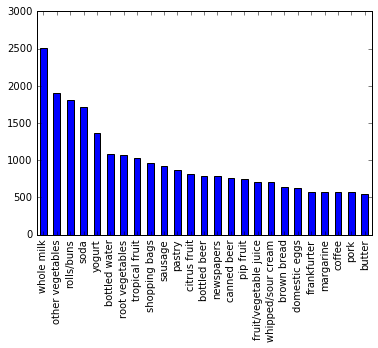

In [5]:
items = 

Make a Pandas series of the items, indexed by item name. 

In [6]:
items = 

Make a function that maps each item to the _iloc_ in the series.

In [7]:
def item_iloc(transaction):
    return(...)
item_iloc('tropical fruit, yogurt,coffee')

[90, 116, 128]

Now construct a new transactions jagged array _X_ with instead of item names, _iloc_ values.

In [8]:
X = 
X[0:9]

[[90, 116, 128],
 [115],
 [123, 116, 35, 13],
 [42, 115, 1, 65],
 [115, 48, 116, 9, 28],
 [61],
 [42, 166, 61, 43, 94],
 [22],
 [115, 47]]

# Aprior

In [9]:
from orangecontrib.associate.fpgrowth import frequent_itemsets, association_rules

Aprori is one of the first association rule algorithms. It needs multiple scans of database. This is the reason the algorithm doesn't scale well. We will use the [orange3-associate](http://orange3-associate.readthedocs.io/en/latest/scripting.html) package for this. You can install it using 

pip install -i https://pypi.anaconda.org/ales-erjavec/simple orange3-associate.

Create a dictionary with frequent itemsets. (support >= 1%)

In [10]:
itemsets = 

333

Now extract the rules from this itemset with confidence >= 50%.

In [11]:
rules = 

15

Pretty-print the rules with their supports and confidences.

In [12]:
for ant, conseq, supp, conf in rules:
    print('{{{}}} --> {{{}}} (supp: {}, conf {:.2f})'.
          format(','.join(items.iloc[list(ant)]), 
                 ','.join(items.iloc[list(conseq)]), 
                 supp, conf))

{butter,other vegetables} --> {whole milk} (supp: 113, conf 0.57)
{root vegetables,tropical fruit} --> {other vegetables} (supp: 121, conf 0.58)
{root vegetables,yogurt} --> {whole milk} (supp: 143, conf 0.56)
{yogurt,whipped/sour cream} --> {whole milk} (supp: 107, conf 0.52)
{yogurt,curd} --> {whole milk} (supp: 99, conf 0.58)
{tropical fruit,yogurt} --> {whole milk} (supp: 149, conf 0.52)
{other vegetables,whipped/sour cream} --> {whole milk} (supp: 144, conf 0.51)
{domestic eggs,other vegetables} --> {whole milk} (supp: 121, conf 0.55)
{root vegetables,tropical fruit} --> {whole milk} (supp: 118, conf 0.57)
{other vegetables,pip fruit} --> {whole milk} (supp: 133, conf 0.52)
{other vegetables,yogurt} --> {whole milk} (supp: 219, conf 0.51)
{root vegetables,rolls/buns} --> {whole milk} (supp: 125, conf 0.52)
{root vegetables,yogurt} --> {other vegetables} (supp: 127, conf 0.50)
{root vegetables,citrus fruit} --> {other vegetables} (supp: 102, conf 0.59)
{root vegetables,rolls/buns} 

# FP-growth

FP-Growth scales better than Apriori. Note that a decent parallel implementation exist in _spark.mllib_. This can be used on large dataset in a Hadoop environment. See [here](https://spark.apache.org/docs/2.1.0/mllib-frequent-pattern-mining.html).